# Get scaled hourly google trends data

In [1]:
import datetime
from pytrends.request import TrendReq
import pandas as pd
import numpy as np

In [2]:
start_date=datetime.date(2021,12,24)
end_date=datetime.date(2022,7,1)

keyword_list=['Bitcoin']

In [3]:
weekly_dates=[]

temp_date_start=start_date
weekly_dates.append(temp_date_start)

while temp_date_start+datetime.timedelta(days=7) <= end_date:
    temp_date_start+=datetime.timedelta(days=7)
    weekly_dates.append(temp_date_start)

if temp_date_start+datetime.timedelta(days=7) >end_date:
    weekly_dates.append(end_date)

In [4]:
weekly_dates

[datetime.date(2021, 12, 24),
 datetime.date(2021, 12, 31),
 datetime.date(2022, 1, 7),
 datetime.date(2022, 1, 14),
 datetime.date(2022, 1, 21),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 25),
 datetime.date(2022, 3, 4),
 datetime.date(2022, 3, 11),
 datetime.date(2022, 3, 18),
 datetime.date(2022, 3, 25),
 datetime.date(2022, 4, 1),
 datetime.date(2022, 4, 8),
 datetime.date(2022, 4, 15),
 datetime.date(2022, 4, 22),
 datetime.date(2022, 4, 29),
 datetime.date(2022, 5, 6),
 datetime.date(2022, 5, 13),
 datetime.date(2022, 5, 20),
 datetime.date(2022, 5, 27),
 datetime.date(2022, 6, 3),
 datetime.date(2022, 6, 10),
 datetime.date(2022, 6, 17),
 datetime.date(2022, 6, 24),
 datetime.date(2022, 7, 1),
 datetime.date(2022, 7, 1)]

In [5]:
trends_list=[]
zone = "T0"
for i in range(len(weekly_dates)-1):
    get_date=str(weekly_dates[i])+zone+" "+str(weekly_dates[i+1])+zone
    get_trends=TrendReq(retries=3, backoff_factor=0.5)
    get_trends.build_payload(kw_list=keyword_list,timeframe=get_date)
    temp_trends=get_trends.interest_over_time()
    trends_list.append(temp_trends)
    print("Call {} of {}: Timeframe {} ".format(i+1, len(weekly_dates)-1, get_date) )

Call 1 of 28: Timeframe 2021-12-24T0 2021-12-31T0 
Call 2 of 28: Timeframe 2021-12-31T0 2022-01-07T0 
Call 3 of 28: Timeframe 2022-01-07T0 2022-01-14T0 
Call 4 of 28: Timeframe 2022-01-14T0 2022-01-21T0 
Call 5 of 28: Timeframe 2022-01-21T0 2022-01-28T0 
Call 6 of 28: Timeframe 2022-01-28T0 2022-02-04T0 
Call 7 of 28: Timeframe 2022-02-04T0 2022-02-11T0 
Call 8 of 28: Timeframe 2022-02-11T0 2022-02-18T0 
Call 9 of 28: Timeframe 2022-02-18T0 2022-02-25T0 
Call 10 of 28: Timeframe 2022-02-25T0 2022-03-04T0 
Call 11 of 28: Timeframe 2022-03-04T0 2022-03-11T0 
Call 12 of 28: Timeframe 2022-03-11T0 2022-03-18T0 
Call 13 of 28: Timeframe 2022-03-18T0 2022-03-25T0 
Call 14 of 28: Timeframe 2022-03-25T0 2022-04-01T0 
Call 15 of 28: Timeframe 2022-04-01T0 2022-04-08T0 
Call 16 of 28: Timeframe 2022-04-08T0 2022-04-15T0 
Call 17 of 28: Timeframe 2022-04-15T0 2022-04-22T0 
Call 18 of 28: Timeframe 2022-04-22T0 2022-04-29T0 
Call 19 of 28: Timeframe 2022-04-29T0 2022-05-06T0 
Call 20 of 28: Timefr

In [6]:
trends_list[0]

,Bitcoin,isPartial
date,,
2021-12-24 00:00:00,79,False
2021-12-24 01:00:00,83,False
2021-12-24 02:00:00,81,False
2021-12-24 03:00:00,84,False
2021-12-24 04:00:00,77,False
...,...,...
2021-12-30 20:00:00,76,False
2021-12-30 21:00:00,82,False
2021-12-30 22:00:00,77,False


In [7]:
trend=trends_list[0:-1]

In [8]:
for i, data in enumerate(trend):
    data.drop(columns=['isPartial'], inplace=True)

In [9]:
keyword=keyword_list[0]
for i in range(len(trend)-1):
    temp_ratio=float(trend[i][keyword].iloc[-1])/float(trend[i+1][keyword].iloc[0])
    trend[i+1]['ratio']=temp_ratio
    trend[0]['Scaled Value']=trend[0][keyword]
    trend[0]['ratio']=0
    trend[i+1]['Scaled Value']=trend[i+1][keyword].apply(lambda x: x*trend[i+1]['ratio'].iloc[0])
    trend[i+1][keyword]=trend[i+1]['Scaled Value']

In [10]:
trend[-1]

,Bitcoin,ratio,Scaled Value
date,,,
2022-06-24 00:00:00,96.976185,1.310489,96.976185
2022-06-24 01:00:00,83.871295,1.310489,83.871295
2022-06-24 02:00:00,82.560806,1.310489,82.560806
2022-06-24 03:00:00,89.113251,1.310489,89.113251
2022-06-24 04:00:00,85.181784,1.310489,85.181784
...,...,...,...
2022-06-30 20:00:00,127.117432,1.310489,127.117432
2022-06-30 21:00:00,129.738410,1.310489,129.738410
2022-06-30 22:00:00,131.048899,1.310489,131.048899


In [11]:
df=pd.concat(trend)

In [12]:
df

,Bitcoin,Scaled Value,ratio
date,,,
2021-12-24 00:00:00,79.000000,79.000000,0.000000
2021-12-24 01:00:00,83.000000,83.000000,0.000000
2021-12-24 02:00:00,81.000000,81.000000,0.000000
2021-12-24 03:00:00,84.000000,84.000000,0.000000
2021-12-24 04:00:00,77.000000,77.000000,0.000000
...,...,...,...
2022-06-30 20:00:00,127.117432,127.117432,1.310489
2022-06-30 21:00:00,129.738410,129.738410,1.310489
2022-06-30 22:00:00,131.048899,131.048899,1.310489


In [13]:
df_without_duplicates = df[~df.index.duplicated(keep='last')]

In [14]:
max_trend_value=np.max(df_without_duplicates['Scaled Value'])
df_without_duplicates['Bitcoin trend']=df_without_duplicates['Scaled Value']/max_trend_value *100

/Users/yujiewang/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_without_duplicates

,Bitcoin,Scaled Value,ratio,Bitcoin trend
date,,,,
2021-12-24 00:00:00,79.000000,79.000000,0.000000,21.180458
2021-12-24 01:00:00,83.000000,83.000000,0.000000,22.252886
2021-12-24 02:00:00,81.000000,81.000000,0.000000,21.716672
2021-12-24 03:00:00,84.000000,84.000000,0.000000,22.520993
2021-12-24 04:00:00,77.000000,77.000000,0.000000,20.644244
...,...,...,...,...
2022-06-30 20:00:00,127.117432,127.117432,1.310489,34.081081
2022-06-30 21:00:00,129.738410,129.738410,1.310489,34.783784
2022-06-30 22:00:00,131.048899,131.048899,1.310489,35.135135


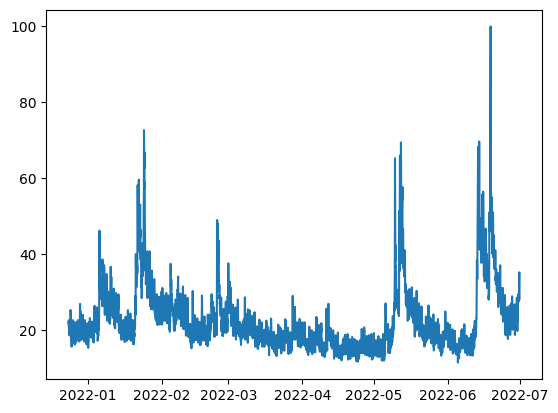

In [16]:
import matplotlib.pyplot as plt
plt.plot(df_without_duplicates['Bitcoin trend'])

In [17]:
df_scaled=df_without_duplicates.drop(columns=['ratio','Bitcoin'])
df_scaled

,Scaled Value,Bitcoin trend
date,,
2021-12-24 00:00:00,79.000000,21.180458
2021-12-24 01:00:00,83.000000,22.252886
2021-12-24 02:00:00,81.000000,21.716672
2021-12-24 03:00:00,84.000000,22.520993
2021-12-24 04:00:00,77.000000,20.644244
...,...,...
2022-06-30 20:00:00,127.117432,34.081081
2022-06-30 21:00:00,129.738410,34.783784
2022-06-30 22:00:00,131.048899,35.135135


In [18]:
df_scaled.to_csv("./../../data/Google Trends/Trends_replace.csv")